# SEIR model example

\begin{align}
\dot{S} & = - \alpha\beta\frac{SI}{N} + \rho_{RS} R + \phi_S \\
\dot{E} & =  \alpha\beta\frac{SI}{N} - E\frac{1}{\tau_{EI}}+ \phi_E\\
\dot{I} & =  E\frac{1}{\tau_{EI}} - I\frac{1}{\tau_{IR}}+ \phi_I\\
\dot{R} & =  I\frac{1}{\tau_{IR}} - \rho_{IR} R + \phi_R\\
\dot{\Phi} & = \sum_{i} (\phi_{i}) \\
N & = N_0 + \Phi \\
N_0 & = S_0+E_0+I_0+R_0  \\
\end{align}

Where:  
* $S:$ Susceptible Individuals
* $E:$ Exposed Individuals
* $I:$ Infectious Individuals
* $R:$ Removed Individuals
* $\alpha:$ Average number of contacts per person per time
* $\beta:$ Probability of disease transmission in a contact between a susceptible and an infectious subject
* $N:$ Total population
* $\tau_{EI}:$ Transition time between exposed and infectious
* $\tau_{IR}:$ Transition time between infectious and recovered
* $\rho_{RS}:$ Immunity loss rate. Inverse of Immunity loss rate medium time ($\frac{1}{t_{RS}}$)  
* $\phi_S,\phi_E,\phi_I,\phi_R:$ External flux per compartment
* $\Phi$: Total external population flux 

In [1]:
from cv19gm.models.seir import SEIR

In [2]:
# Util libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# cv19 libraries
from cv19gm.models.seir import SEIR
import cv19gm.utils.cv19functions as cv19functions

# Build a basic SEIR model using a configuration file

## Constant parameters

In [3]:
# Input configuration file
config = 'cfg/SEIR.toml'

In [4]:
# Build simulation object
model = SEIR(config = config ,beta=0.3,tI_R= 10)

In [5]:
#%%capture
# Simulate (solve ODE)
model.solve()

In [6]:
model.results

,t,dates,S,E,E_d,I,I_d,R,R_d,Flux,...,I_d_det,I_ac_det,beta,alpha,tE_I,tI_R,rR_S,prevalence_total,prevalence_susc,prevalence_det
0,0,None,986000,3000,1500,6000,3000,5000,0,0,...,3000,15000,0.3,1.0,5.0,10.0,0.0,0.015000,0.015000,0.015000
1,1,None,984216,4073,1681,6106,1563,5603,382,0,...,1563,18000,0.3,1.0,5.0,10.0,0.0,0.018000,0.018000,0.018000
2,2,None,982376,5003,1785,6392,1159,6227,536,0,...,1159,19563,0.3,1.0,5.0,10.0,0.0,0.019564,0.019564,0.019564
3,3,None,980434,5858,1890,6820,1122,6886,616,0,...,1122,20723,0.3,1.0,5.0,10.0,0.0,0.020724,0.020724,0.020724
4,4,None,978352,6685,2019,7366,1214,7595,677,0,...,1214,21846,0.3,1.0,5.0,10.0,0.0,0.021846,0.021846,0.021846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,59570,0,0,0,0,940429,0,0,...,0,949156,0.3,1.0,5.0,10.0,0.0,0.949156,0.949156,0.949156
496,496,None,59570,0,0,0,0,940429,0,0,...,0,949156,0.3,1.0,5.0,10.0,0.0,0.949156,0.949156,0.949156
497,497,None,59570,0,0,0,0,940429,0,0,...,0,949156,0.3,1.0,5.0,10.0,0.0,0.949156,0.949156,0.949156
498,498,None,59570,0,0,0,0,940429,0,0,...,0,949156,0.3,1.0,5.0,10.0,0.0,0.949156,0.949156,0.949156


In [7]:
model.compartments

,t,dates,S,E,E_d,I,I_d,R,R_d,Flux,E_ac,I_ac,R_ac,I_det,I_d_det,I_ac_det
0,0,None,986000,3000,1500,6000,3000,5000,0,0,7500,15000,5000,6000,3000,15000
1,1,None,984216,4073,1681,6106,1563,5603,382,0,9000,18000,5000,6106,1563,18000
2,2,None,982376,5003,1785,6392,1159,6227,536,0,10681,19563,5382,6392,1159,19563
3,3,None,980434,5858,1890,6820,1122,6886,616,0,12466,20723,5918,6820,1122,20723
4,4,None,978352,6685,2019,7366,1214,7595,677,0,14357,21846,6534,7366,1214,21846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,59570,0,0,0,0,940429,0,0,936217,949156,940385,0,0,949156
496,496,None,59570,0,0,0,0,940429,0,0,936217,949156,940385,0,0,949156
497,497,None,59570,0,0,0,0,940429,0,0,936217,949156,940385,0,0,949156
498,498,None,59570,0,0,0,0,940429,0,0,936217,949156,940385,0,0,949156


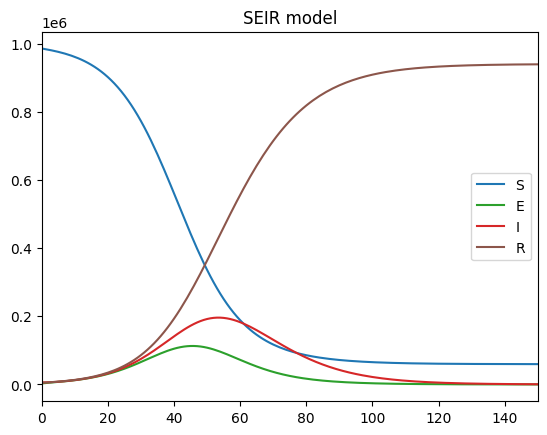

In [8]:
# Plot matplotlib
plt.plot(model.t,model.S,label='S',color='tab:blue')
plt.plot(model.t,model.E,label='E',color='tab:green')
plt.plot(model.t,model.I,label='I',color='tab:red')
#plt.plot(model.t,model.I_d,label='I_d')
plt.plot(model.t,model.R,label='R',color='tab:brown')
plt.xlim(0,150)
plt.legend(loc=0)
plt.title('SEIR model')
plt.show()

Text(0.5, 1.0, 'SEIR simulation plot')

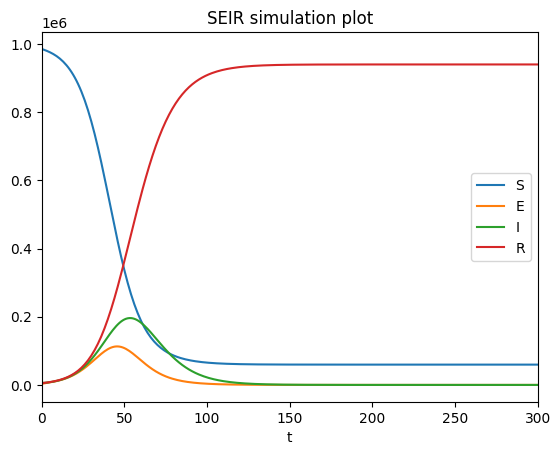

In [9]:
# Plot with pandas
ax = model.results.plot(x='t',y=['S','E','I','R'])
ax.set_xlim(0,300)
ax.set_title('SEIR simulation plot')

## Variable parameters
Create a function with time dependent parameters. Check covid19functions notebook for more information on this.

In [10]:
config2 = 'cfg/SEIR_v2.toml'

In [11]:
model2 = SEIR(config = config2)

In [12]:
model2.solve()

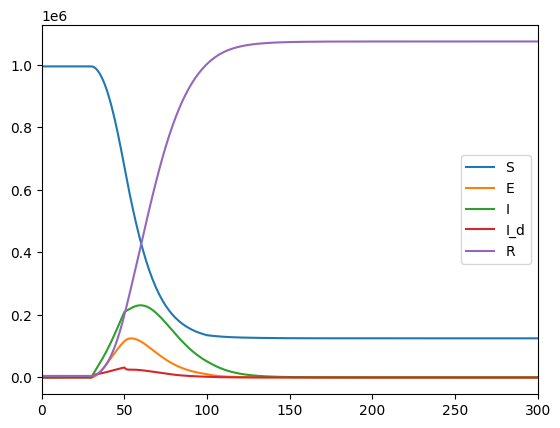

In [13]:
plt.plot(model2.t,model2.S,label='S')
plt.plot(model2.t,model2.E,label='E')
plt.plot(model2.t,model2.I,label='I')
plt.plot(model2.t,model2.I_d,label='I_d')
plt.plot(model2.t,model2.R,label='R')
plt.xlim(0,300)
plt.legend(loc=0)
plt.show()

# SEIR desde cmd

In [14]:
beta = 0.2
population = 10000
I = 100

In [15]:
model = SEIR(config = config)

In [16]:
model.solve()

### Variable parameters

In [17]:
t = np.linspace(0,6,1000)

In [18]:
beta = lambda t: np.sin(t)

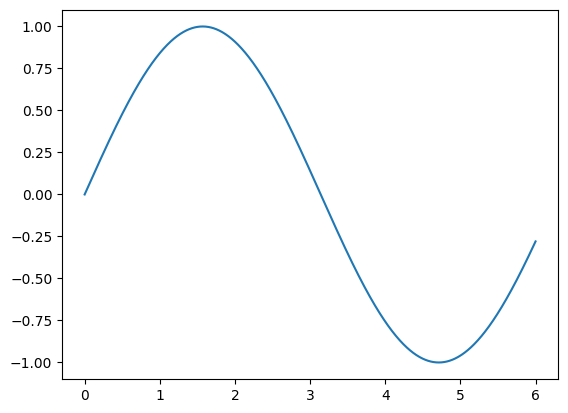

In [19]:
plt.plot(t,beta(t))
plt.show()

In [20]:
model = SEIR(config = config,beta = beta)

In [21]:
model.solve()

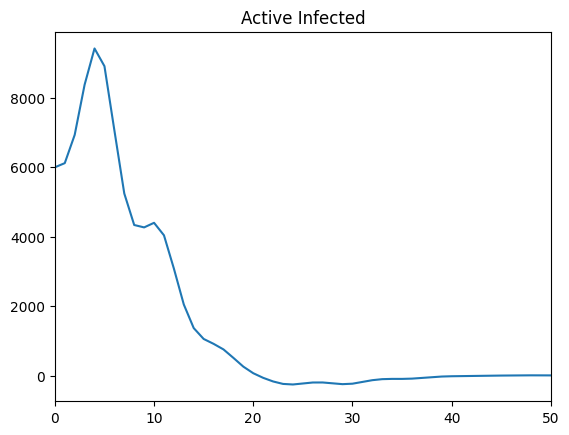

In [22]:
plt.plot(model.t,model.I)
plt.title('Active Infected')
plt.xlim(0,50)
plt.show()

In [23]:
beta2 = cv19functions.events(days=[[0,10],[10,60],[60,100]],values=[0.12,0.2,0.3],default = 0.1)

In [24]:
t = np.linspace(0,200,10000)

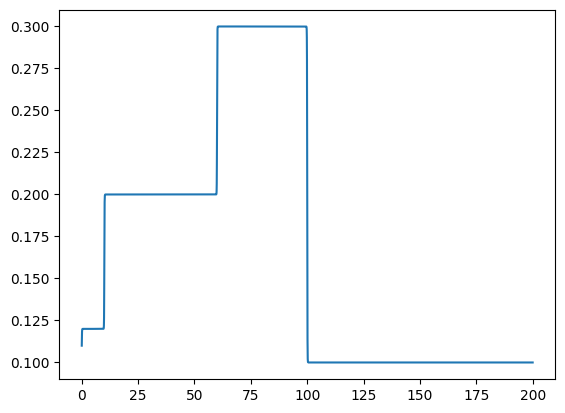

In [25]:
plt.plot(t,beta2(t))

In [26]:
model2 = SEIR(config = config,beta=beta2)

In [27]:
model2.solve()

Text(0.5, 1.0, 'Active Infected')

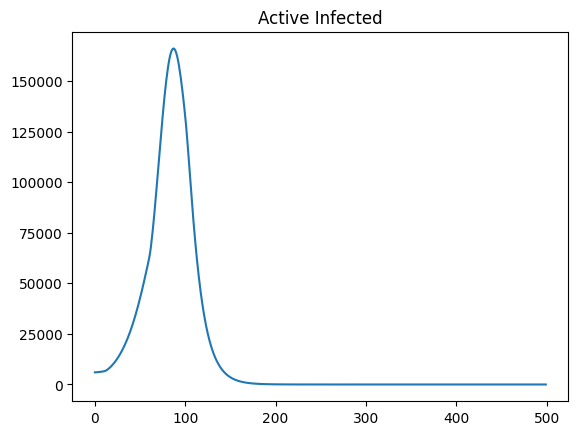

In [28]:
plt.plot(model2.t,model2.I)
plt.title("Active Infected")

# Study

In [29]:
# Input configuration file
config = 'cfg/SEIR.toml'

In [30]:
# Build simulation object
model1 = SEIR(config = config, I_d_det = 600, population = 1000000)
model2 = SEIR(config = config, I_d_det = 600, population = 10000000)

In [31]:
%%capture
# Simulate (solve ODE)
model1.solve()
model2.solve()

In [32]:
model1.I_d[0]

600.0

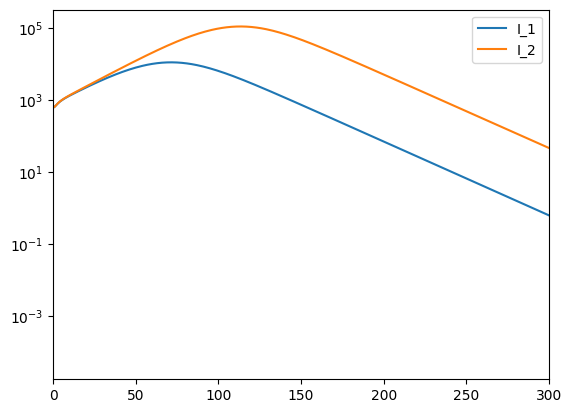

In [33]:
# Plot matplotlib
#plt.plot(model.t,model1.S,label='S')
#plt.plot(model.t,model1.E,label='E')
plt.plot(model.t,model1.I_d,label='I_1')
plt.plot(model.t,model2.I_d,label='I_2')
plt.xlim(0,300)
plt.yscale('log')
plt.legend(loc=0)
plt.show()